#  **Analisis Pola Kesehatan dan Prediksi Risiko Diabetes Menggunakan EDA dan Machine Learning**

## 3KA25
### Nama Anggota Kelompok:
#### 1. Azzahra Dania Indriyani (10122259)
#### 2. Dellia Putri Santoso (10122347)
#### 3. Huwaida Adilya Putri (10122606)
#### 4. Nisrina Syifa (11122084)




# **1. Business Understanding**


## **Tujuan Analisis:**
### Proyek ini bertujuan untuk mengeksplorasi dan memahami pola-pola data yang berkaitan dengan risiko penyakit diabetes melalui pendekatan Exploratory Data Analysis (EDA), serta membandingkan karakteristik umum antara individu yang terdiagnosis diabetes dan yang tidak.
### Hasil dari eksplorasi ini akan dikembangkan lebih lanjut dengan membangun model prediktif berbasis machine learning untuk memprediksi apakah seseorang berisiko terkena diabetes atau tidak, berdasarkan fitur-fitur kesehatan yang tersedia dalam dataset.

## **Sumber Dataset:**
### Kaggle - https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset/data


# **2. Data Understanding**

# Import Library

In [ ]:
# Mengimpor Library Numpy dengan alias 'np'
import numpy as np
# Mengimpor Library Pandas dengan alias 'pd'
import pandas as pd
# Mengimpor Library Matplotlib dengan alias 'plt'
import matplotlib.pyplot as plt
# Mengimpor Library Seaborn dengan alias 'sns'
import seaborn as sns
# Mengimpor Library untuk pemodelan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Load Data

In [ ]:
# Membaca file CSV dari direktori lokal
df = pd.read_csv('diabetes.csv')

# Menampilkan DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Cek kolom, tipe data, dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Cek nilai kosong
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Cek nilai Duplikat
df.duplicated().sum()

np.int64(0)

# Statistik Deskriptif

In [ ]:
# Cek statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analytics (EDA)

## Analisis Univariat

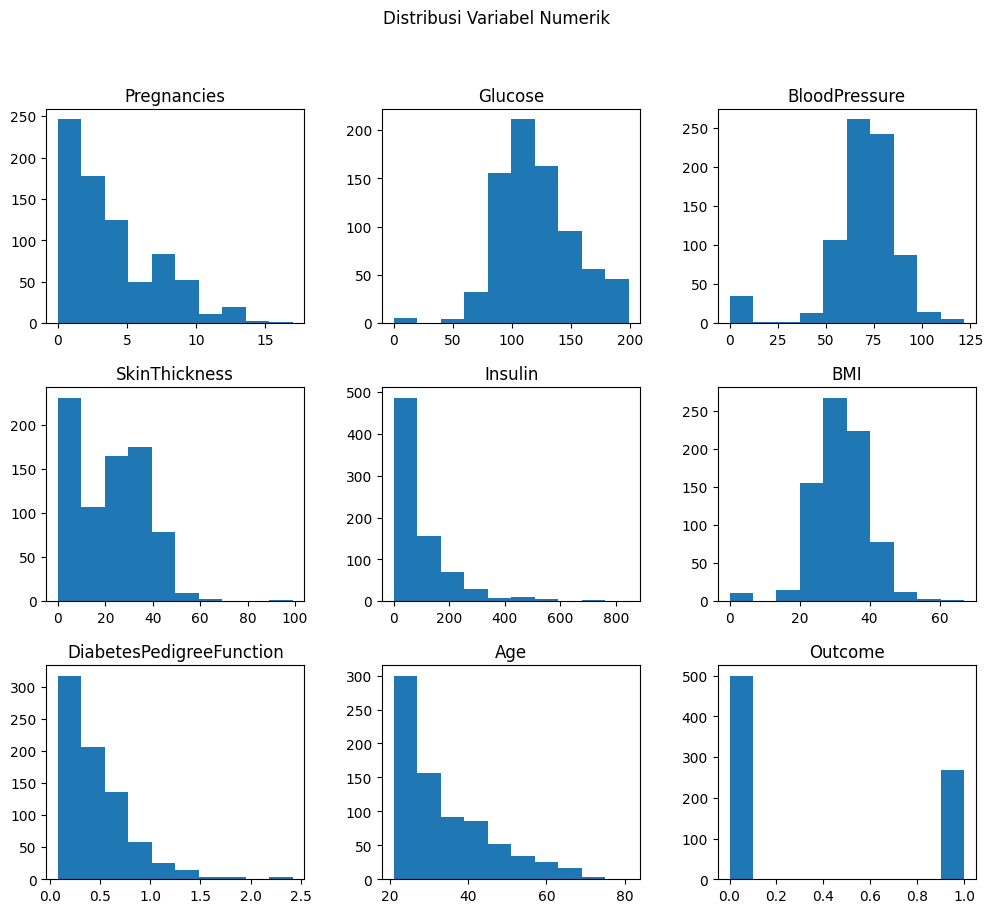

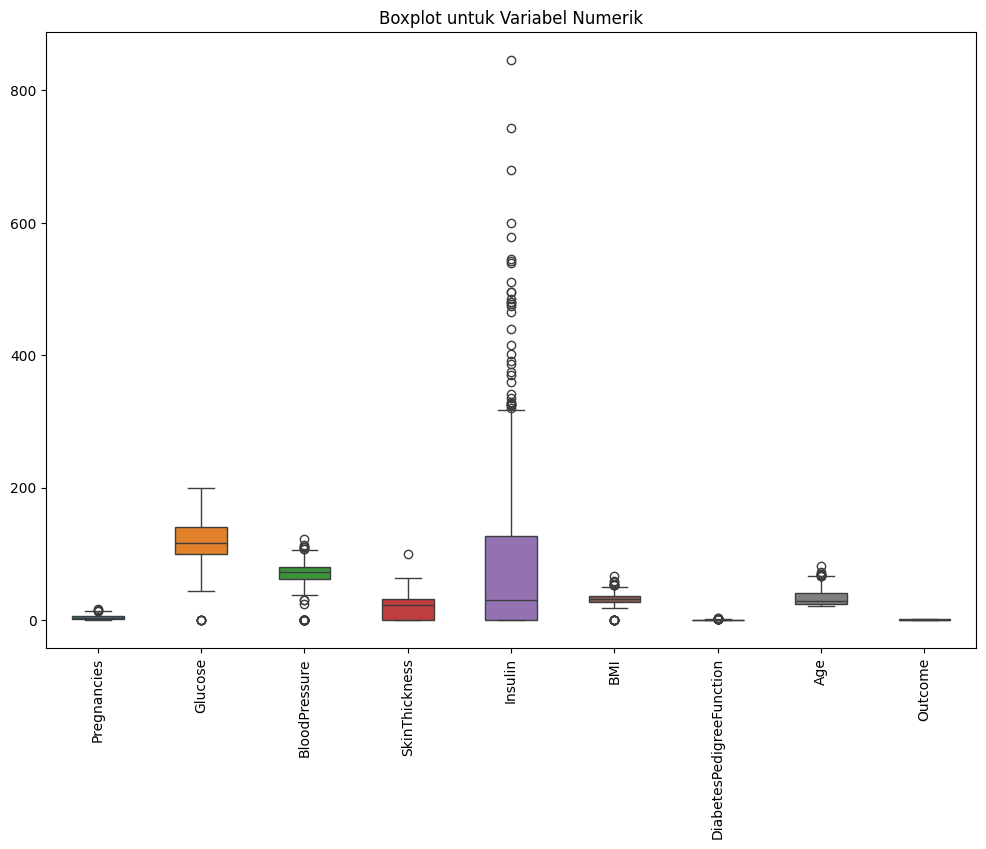

In [ ]:
# Histogram
df.hist(bins=10, figsize=(12, 10), grid=False)
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, width=0.5)
plt.title('Boxplot untuk Variabel Numerik')
plt.xticks(rotation=90)
plt.show()

## Analisis Bivariat

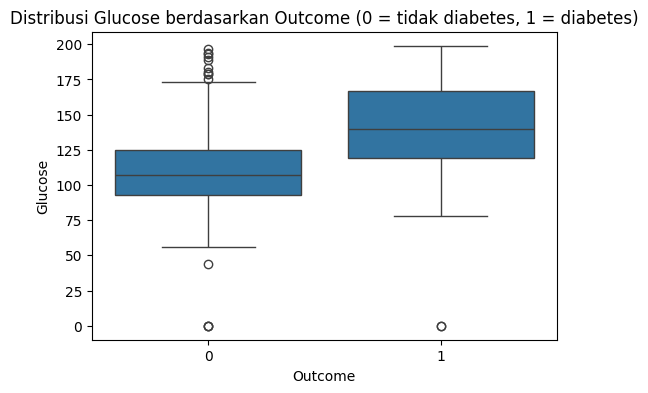

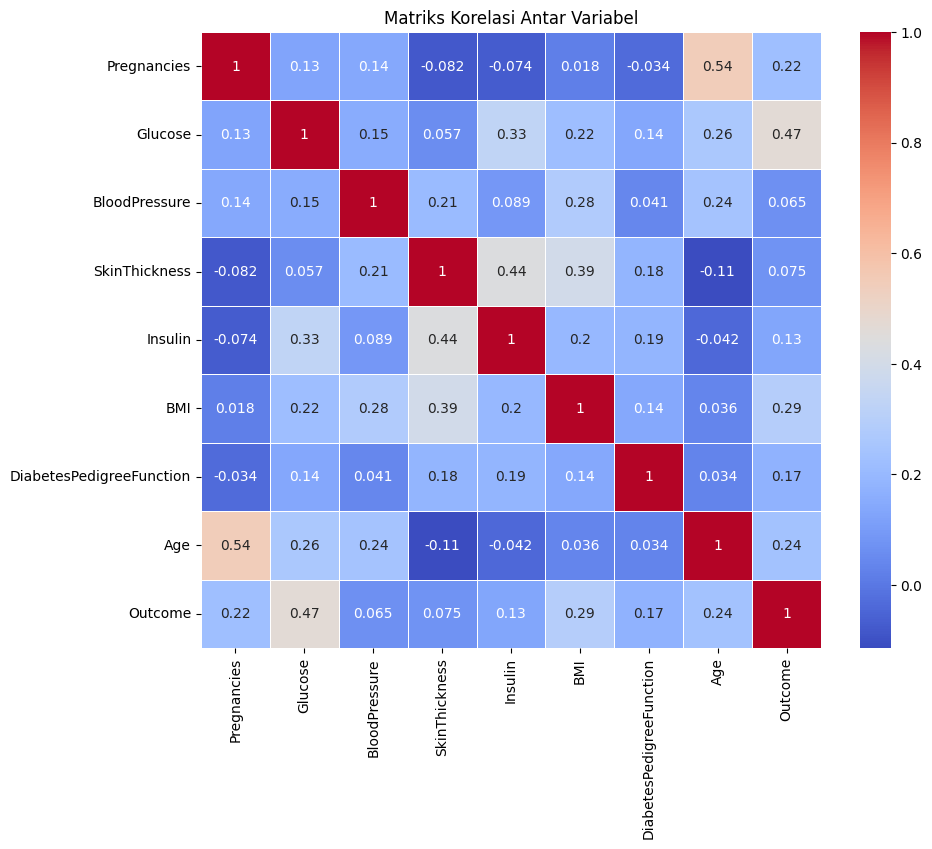

In [ ]:
# Glucose vs Outcome
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribusi Glucose berdasarkan Outcome (0 = tidak diabetes, 1 = diabetes)')
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# Insight
1. Penderita diabetes memiliki rata-rata Glukosa lebih dari 120
2. Outcome dengan Glukosa menjadi acuan dalam pendiagnosaan diabetes berdasarkan kepekatan warna dalam matriks korelasi

## Analisis Multivariat

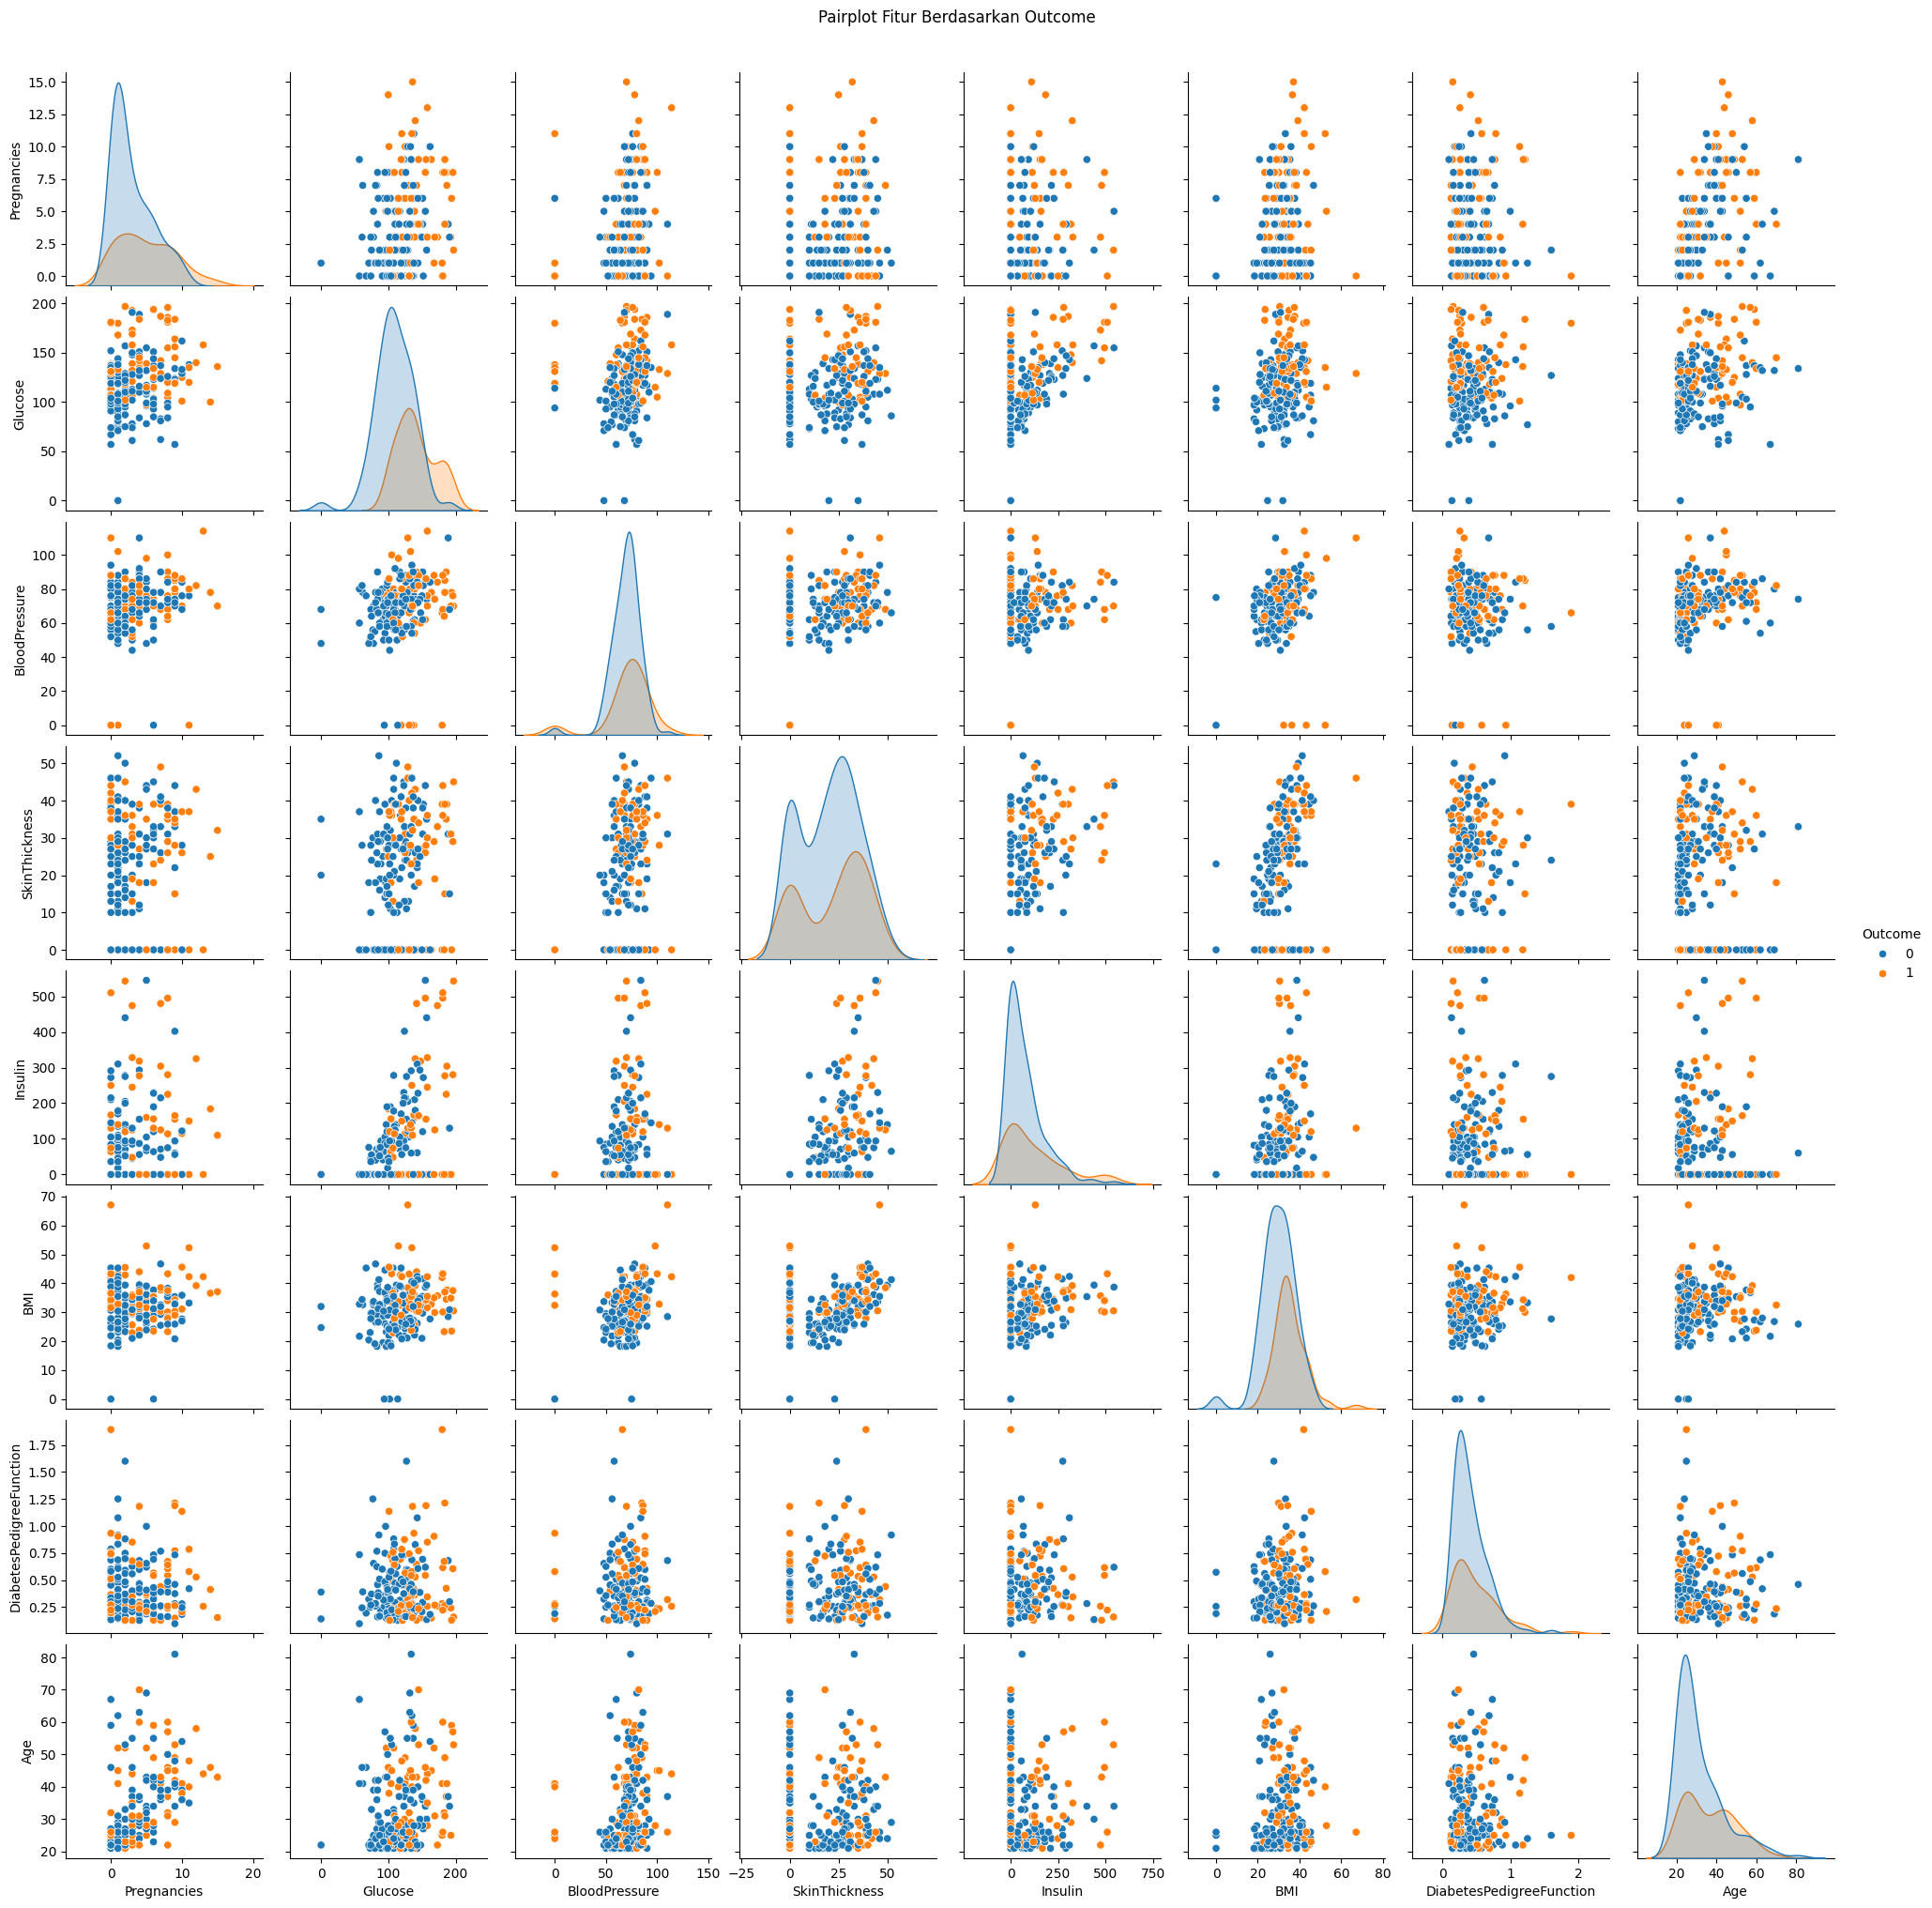

In [ ]:
# Pairplot
sns.pairplot(df.sample(200), hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot Fitur Berdasarkan Outcome', y=1.02)
plt.show()

# Insight
Pasien yang terdiagnosis diabetes umumnya memiliki kadar glukosa dan BMI yang tinggi, berusia lebih tua, serta memiliki riwayat keluarga diabetes.

# Visualisasi Data berdasarkan jumlah

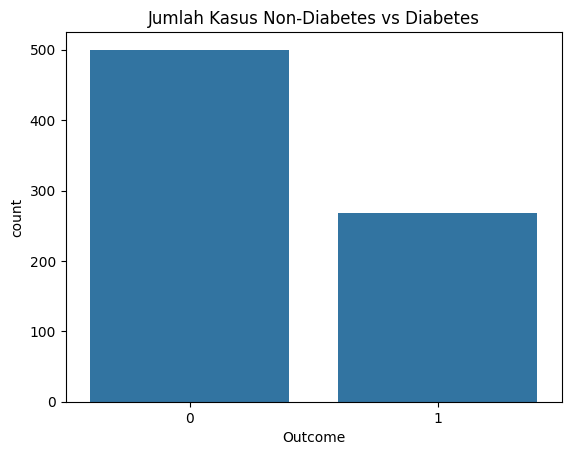

In [ ]:
# Distribusi kelas Outcome
sns.countplot(x='Outcome', data=df)
plt.title('Jumlah Kasus Non-Diabetes vs Diabetes')
plt.show()

## Insight
*   Jumlah kasus seseorang yang tidak mengidap diabetes lebih banyak dibandingkan dengan seseorang pengidap diabetes


# **3. Data Preparation**

In [ ]:
# Data Preparation
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 1. Pisah Fitur dan Target

#### X berisi seluruh kolom fitur (selain Outcome)

#### y adalah target label (Outcome) yang menunjukkan apakah seseorang memiliki diabetes (1) atau tidak (0)

### 2. Normalisasi Fitur

#### Menggunakan StandardScaler agar seluruh fitur memiliki skala yang seragam (rata-rata 0 dan standar deviasi 1)

#### Ini penting agar model tidak berat sebelah ke fitur dengan skala besar

### 3. Split Data (Training & Testing)

#### Dataset dibagi menjadi 80% data training dan 20% data testing

random_state=42 digunakan agar hasil pembagian data tetap konsisten jika dijalankan ulang



# **4. Modeling**

In [ ]:
# Inisialisasi model XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Tentukan parameter grid untuk dicoba
param_grid = {
    'n_estimators': [50, 100, 150],         # jumlah pohon
    'max_depth': [3, 5, 7],                 # kedalaman pohon
    'learning_rate': [0.01, 0.1, 0.2],     # step size shrinkage
    'subsample': [0.6, 0.8, 1],             # proporsi data tiap pohon
    'colsample_bytree': [0.6, 0.8, 1],      # proporsi fitur tiap pohon
    'gamma': [0, 1, 5]                      # minimum loss reduction untuk split pohon
}

# Setup GridSearchCV (5-fold cross-validation)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

# Jalankan grid search fit
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
("Best parameters found: ", grid_search.best_params_)

# Pakai model terbaik untuk prediksi test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


### 1. Inisialisasi Model

#### Menggunakan XGBoostClassifier dengan eval_metric='logloss' dan random_state=42 untuk konsistensi.

### 2. Tentukan Parameter Grid

#### Disiapkan kombinasi nilai hyperparameter seperti:

*   n_estimators: Jumlah pohon (misal 50, 100, 150)
*   max_depth: Kedalaman pohon
*   learning_rate: Ukuran langkah untuk update bobot
*   subsample: Persentase data yang dipakai per pohon
*   colsample_bytree: Proporsi fitur yang digunakan
*   gamma: Minimum loss reduction untuk split

### 3. GridSearchCV

#### Menggunakan 5-fold cross-validation untuk mencari kombinasi parameter terbaik berdasarkan skor ROC AUC.

### 4. Training & Pemilihan Model Terbaik

##### Model terbaik dipilih secara otomatis berdasarkan hasil grid search.

##### Dicetak parameter terbaiknya, dan model digunakan untuk memprediksi data uji (X_test).

# **5. Evaluation**

Best parameters found: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

=== Tuned XGBoost Model Evaluation ===
Akurasi   : 75.32%
Presisi   : 64.41%
Recall    : 69.09%
F1-Score  : 66.67%
ROC AUC   : 81.78%

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



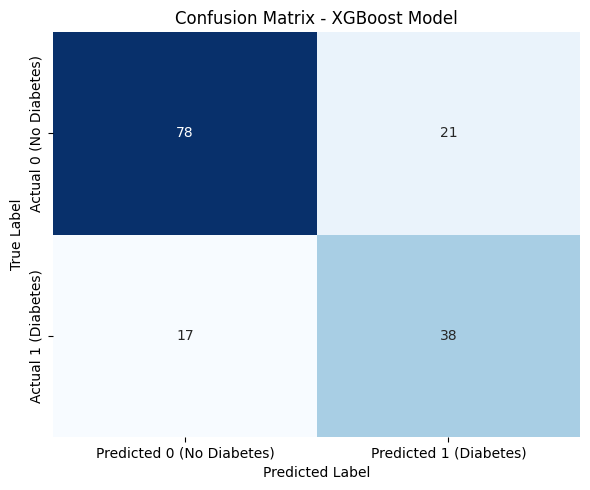

In [ ]:
# Tampilkan parameter terbaik dari GridSearch
print("Best parameters found:", grid_search.best_params_)

# Evaluasi model
print("\n=== Tuned XGBoost Model Evaluation ===")

# Skor dasar dalam persentase
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_pred_proba) * 100  # y_pred_proba = model.predict_proba(X_test)[:,1]

# Tampilkan hasil evaluasi
print(f"Akurasi   : {accuracy:.2f}%")
print(f"Presisi   : {precision:.2f}%")
print(f"Recall    : {recall:.2f}%")
print(f"F1-Score  : {f1:.2f}%")
print(f"ROC AUC   : {roc_auc:.2f}%")

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'],
            yticklabels=['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Model')
plt.tight_layout()
plt.show()